In [8]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns

In [9]:
# read in the data
df = pd.read_csv('OGstats_splitSRAGEO.csv')
totals = df.sum(axis=1)
df.insert(1, "Total", totals, True)
df

,journalName,Total,origSRA,reuseSRA,origGEO,reuseGEO
0,3_Biotech,27,11,16,0,0
1,AAPS_J,1,0,0,1,0
2,ACS_Cent_Sci,2,1,1,0,0
3,ACS_Chem_Biol,6,4,0,1,1
4,ACS_Infect_Dis,3,2,0,1,0
5,ACS_Nano,1,0,0,1,0
6,ACS_Omega,1,0,0,1,0
7,ACS_Synth_Biol,1,0,0,1,0
8,Acta_Crystallogr_D_Biol_Crystallogr,1,1,0,0,0
9,Acta_Naturae,29,25,0,4,0


In [10]:
# split into SRA and GEO

colsSRA = ['journalName', 'origSRA', 'reuseSRA']
dfSRA = pd.DataFrame(df, columns = colsSRA)
colsGEO = ['journalName', 'origGEO', 'reuseGEO']
dfGEO = pd.DataFrame(df, columns = colsGEO)

totals = dfSRA.sum(axis=1)
dfSRA.insert(1, "Total", totals, True)
totals = dfGEO.sum(axis=1)
dfGEO.insert(1, "Total", totals, True)

In [11]:
## CLEAN THE DATA ##
switch = True
for frame in [dfSRA, dfGEO]:
    # remove all-zero rows
    clean_df = frame[frame.Total != 0]
    sorted_df = clean_df.sort_values(['Total'], ascending=False).reset_index(drop=True)

    # take rows with highest totals
    CUTOFF = 150
    mini_df = sorted_df.iloc[list(range(CUTOFF))]
    ind = list(range(CUTOFF, len(sorted_df)))

    # sum the rest into an "other" column
    otherRow = sorted_df.iloc[ind].sum() 
    otherRow['journalName'] = "Other"

    # add "other" to the dataframe
    mini_df = mini_df.append(otherRow.to_frame().transpose(), ignore_index = True)

    if (switch):
        mini_dfSRA = mini_df
        switch = False
    else:
        mini_dfGEO = mini_df

In [12]:
# create a new dataframe with percentages instead of counts
dfPctSRA = pd.DataFrame()
dfPctSRA['journalName'] = mini_dfSRA['journalName']
for i in ['origSRA', 'reuseSRA']:
     dfPctSRA[i] = mini_dfSRA[i]/mini_dfSRA['Total']
        
dfPctGEO = pd.DataFrame()
dfPctGEO['journalName'] = mini_dfGEO['journalName']
for i in ['origGEO', 'reuseGEO']:
     dfPctGEO[i] = mini_dfGEO[i]/mini_dfGEO['Total']
        
# sort by reuse percentage
dfPct_sortedSRA = dfPctSRA.sort_values(['reuseSRA'], ascending=False).reset_index(drop=True)
dfPct_sortedGEO = dfPctGEO.sort_values(['reuseGEO'], ascending=False).reset_index(drop=True)

In [13]:
# set up the dataframe to be graphed
switch = True
for frame in [dfPct_sortedSRA, dfPct_sortedGEO]:
    dfT = frame.transpose()
    newHeader = dfT.iloc[0]
    dfT = dfT[1:]
    dfT.columns = newHeader
    if(switch):
        dfT_SRA = dfT
        switch = False
    else:
        dfT_GEO = dfT

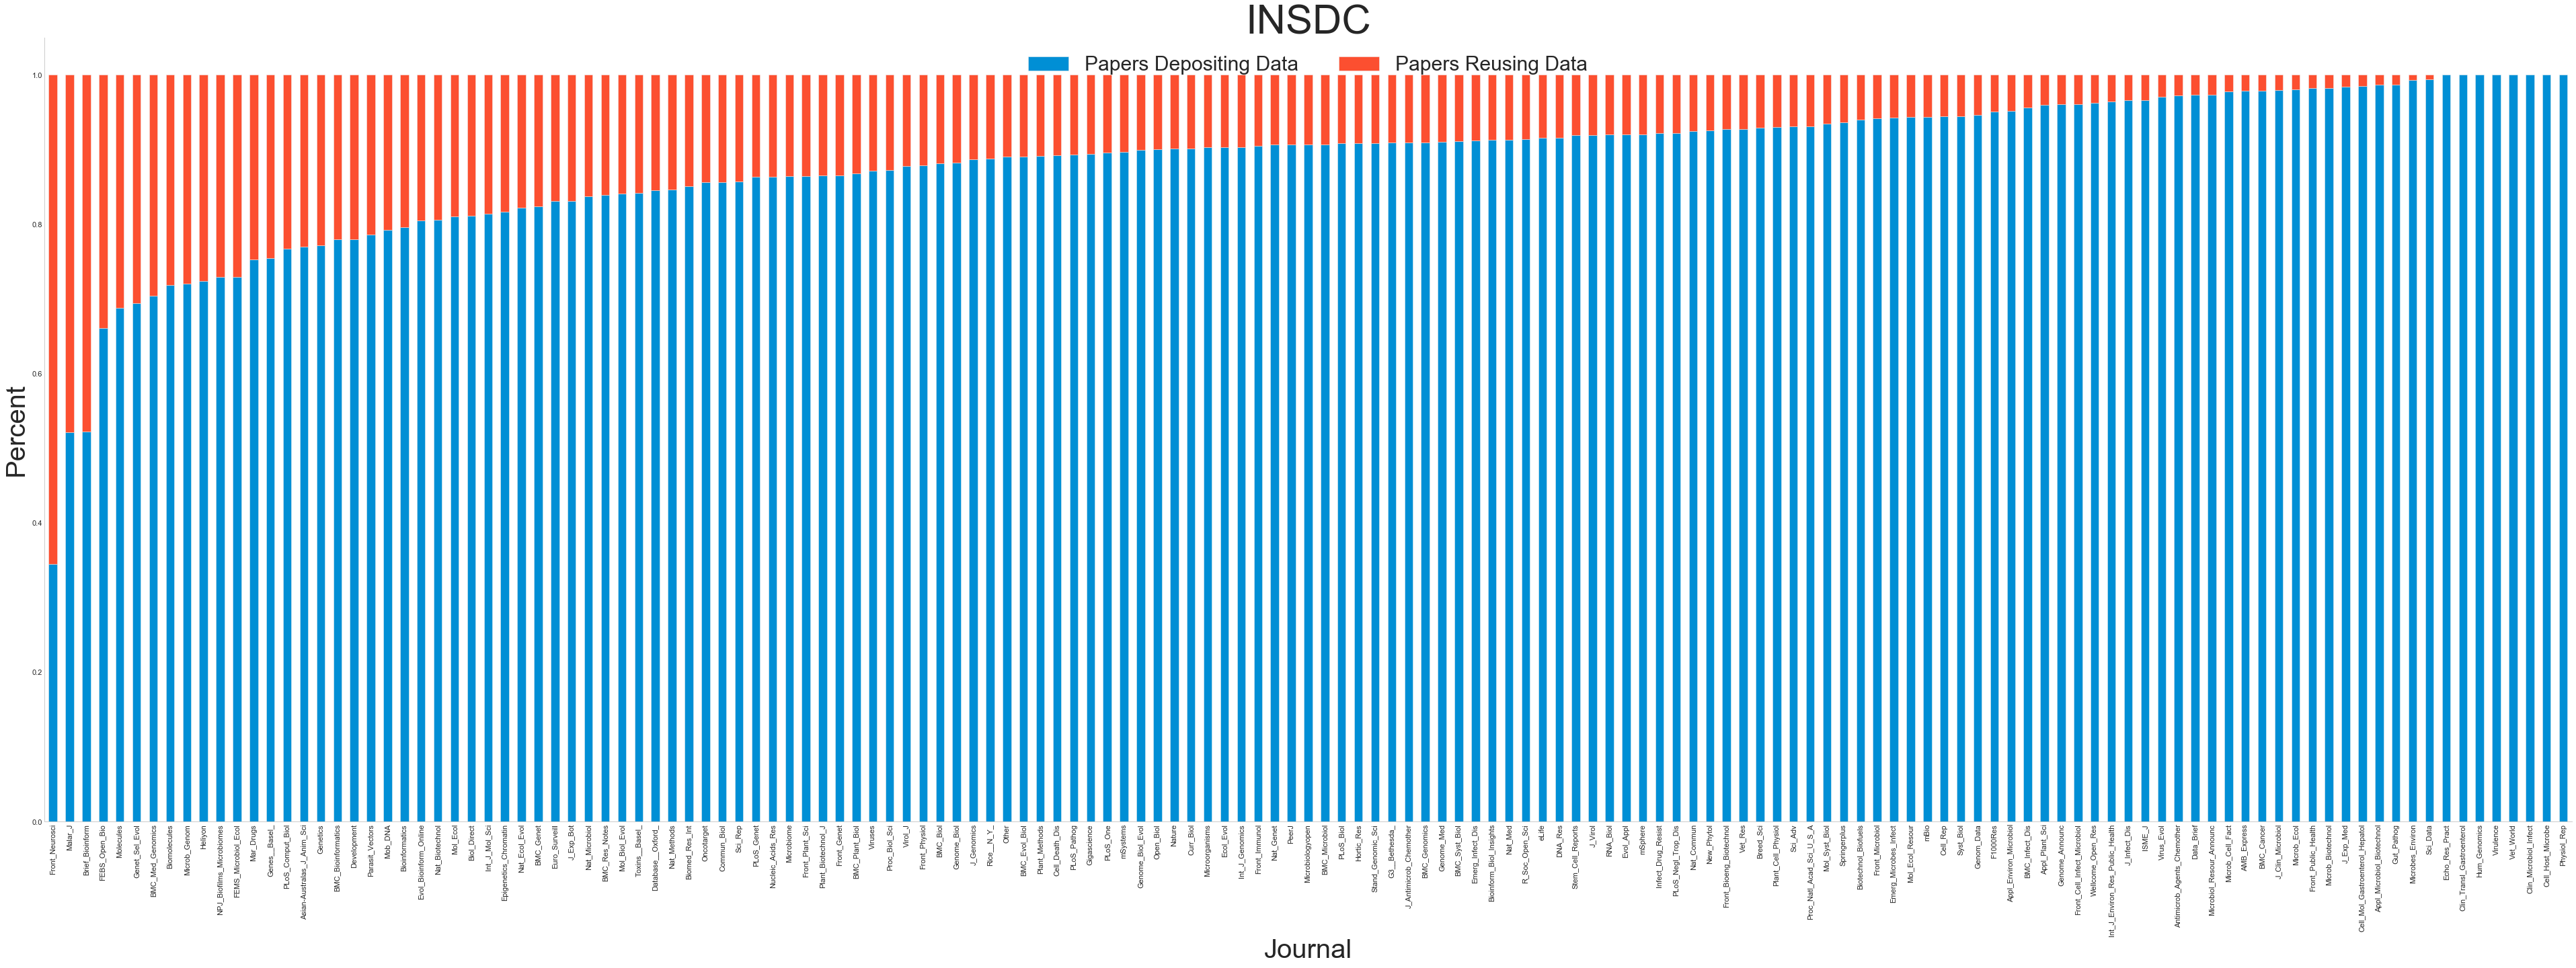

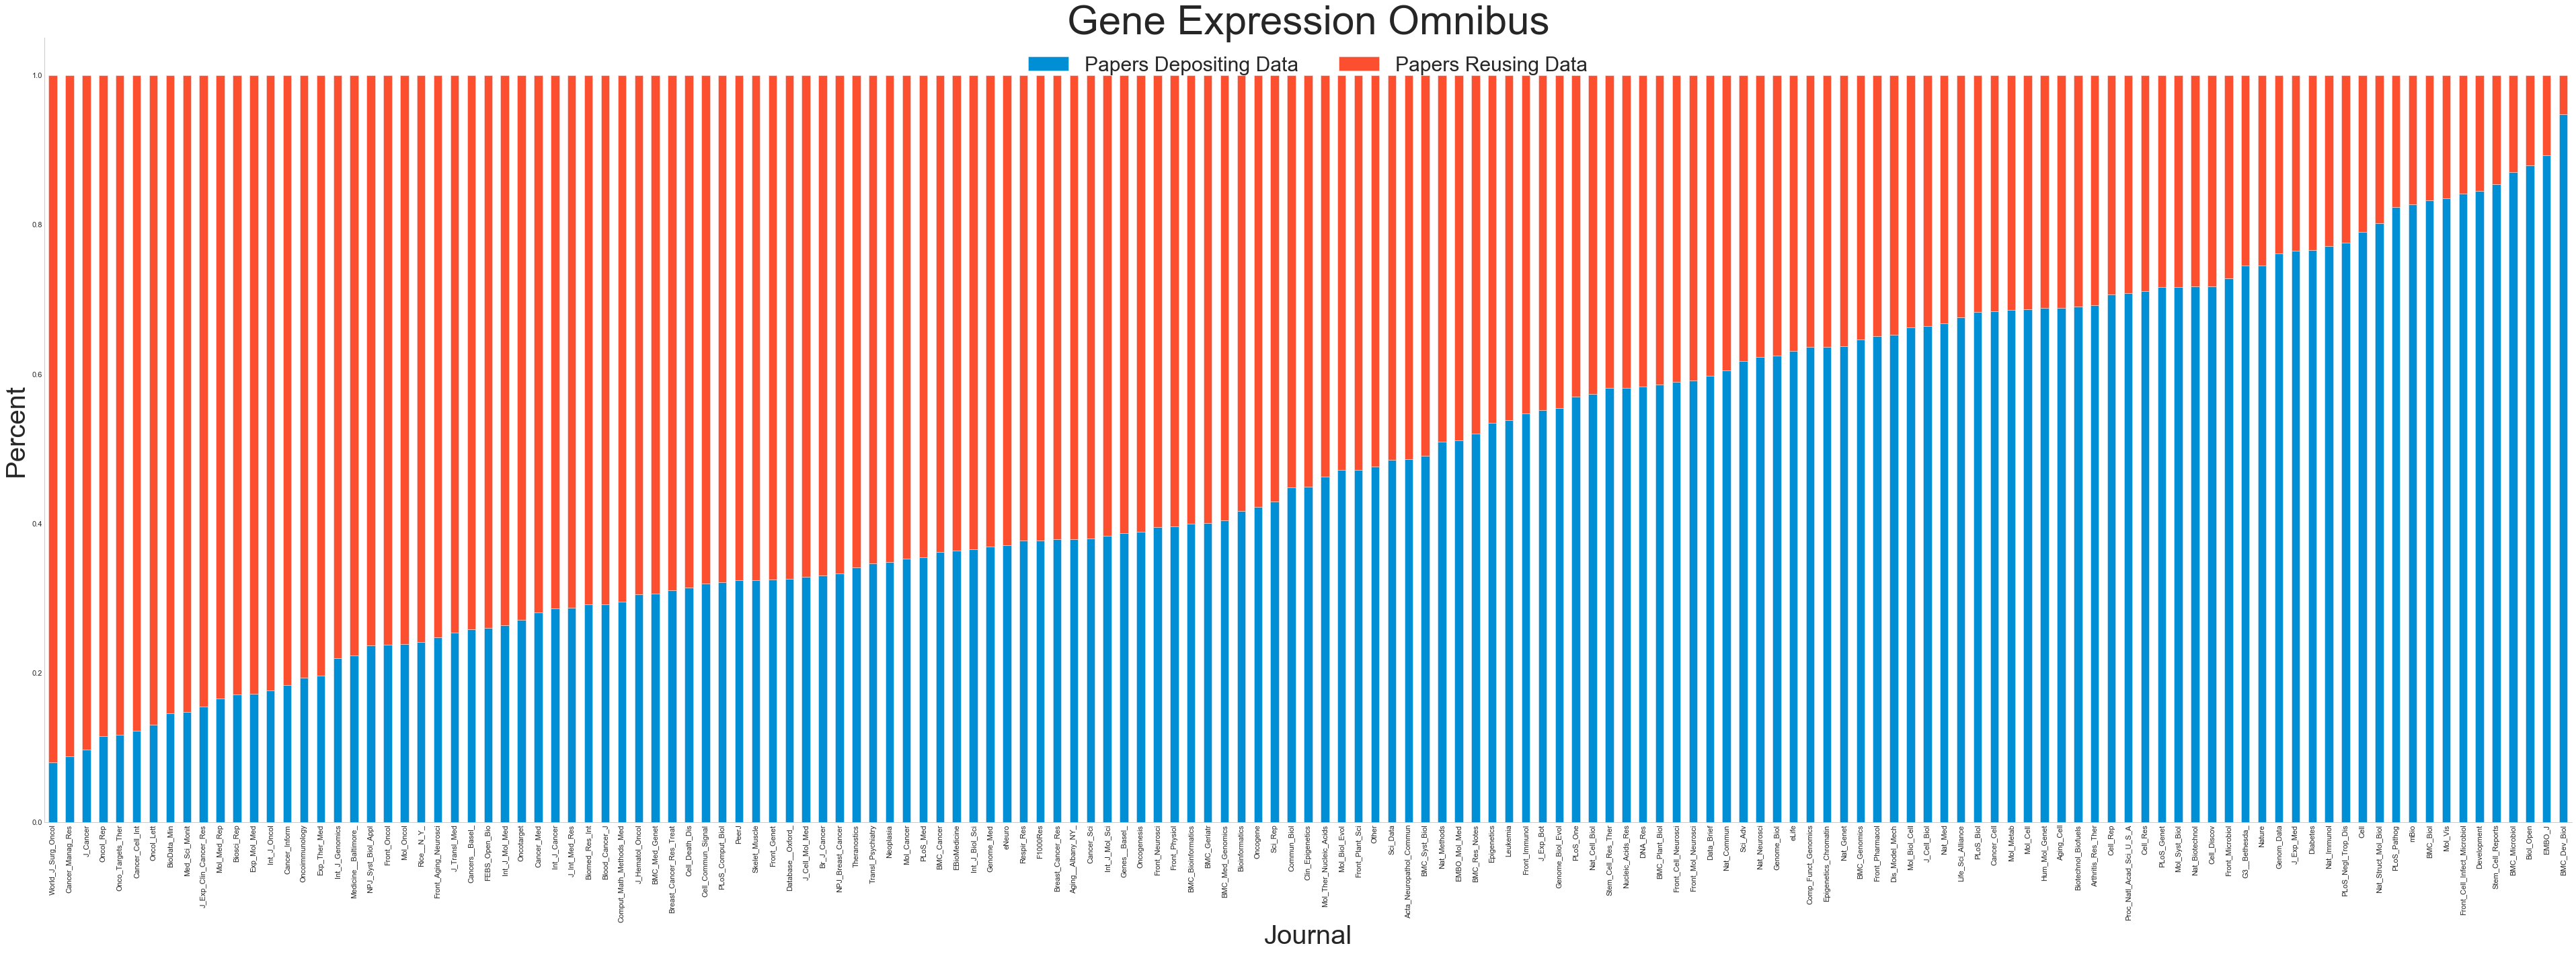

In [15]:
## PLOT TWO STACKED BARCHARTS ##

# make the colors look nice
sns.set(style = 'whitegrid')
plt.style.use(['fivethirtyeight', 'seaborn-whitegrid'])

# create axis objects
axSRA = dfT_SRA.T.plot(kind='bar', stacked=True, figsize=(60,20))
sns.despine()
axSRA.grid(False)
axGEO = dfT_GEO.T.plot(kind='bar', stacked=True, figsize=(60,20))
sns.despine()
axGEO.grid(False)

# create legend objects
axGEO.legend(loc='upper center', ncol = 2, prop={'size': 30}, labels=['Papers Depositing Data', 'Papers Reusing Data'])
axSRA.legend(loc='upper center', ncol = 2, prop={'size': 30}, labels=['Papers Depositing Data', 'Papers Reusing Data'])

# fix all the labels
axGEO.set_title("Gene Expression Omnibus", fontsize=60)
axSRA.set_title("INSDC", fontsize=60)
axGEO.set_xlabel("Journal", fontsize=40)
axGEO.set_ylabel("Percent", fontsize=40)
axSRA.set_xlabel("Journal", fontsize=40)
axSRA.set_ylabel("Percent", fontsize=40)

# create figure objects
graphSRA = axSRA.get_figure()
graphGEO = axGEO.get_figure()

# save to .png files
graphSRA.savefig('percent_reusingSRA.png', dpi = 200, bbox_inches = 'tight', transparent=True)
graphGEO.savefig('percent_reusingGEO.png', dpi = 200, bbox_inches = 'tight', transparent=True)

